In [0]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

(500, 1)


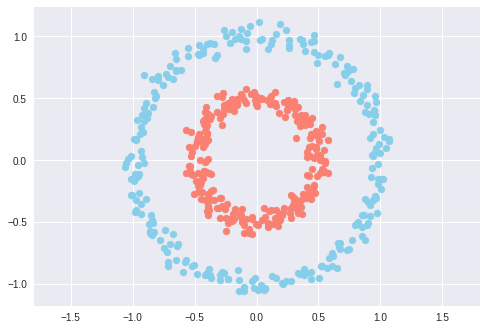

In [36]:
# se crea el dataset
n = 500 # numeros de registros que tenemos en nuestros datos
p = 2 # cuantas caracteristcas tenemos sobre cada uno de nuestros datos

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05) # factor: distancia entre los dos circulos

Y = Y[:, np.newaxis]

print(Y.shape)

plt.scatter(X[Y[:, 0]==0, 0], X[Y[:, 0]==0, 1], c="skyblue") # se visualizan todos los puntos de la coordenada uno y dos de X
plt.scatter(X[Y[:, 0]==1, 0], X[Y[:, 0]==1, 1], c="salmon") # Y representa a que circulo corresponde un punto
plt.axis("equal") # que los ejes tengan la misma proporción
plt.show()

### Recordar que la función de una neurona es:

$ f(b+ w * x) $ # f: función de activación

In [0]:
# clase que representa una capa de la red neuronal
class neural_layer():
  
  # aca se definen los parametros de entrada al momento de crear a la clase
  def __init__(self, n_conn, n_neur, act_f): #n_conn: numero de conexiones con la capa anterior, n_neur: cuantas neuronas hay en la capa, act_f: funcion de activación
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1 # bias: el error de la probabilidad que va entre -1 y 1. es una arrays con la cantidad de valor igual al numero de neuronas
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # weight: el peso de cada entrada, es una matriz de valores aleatorios
    
    

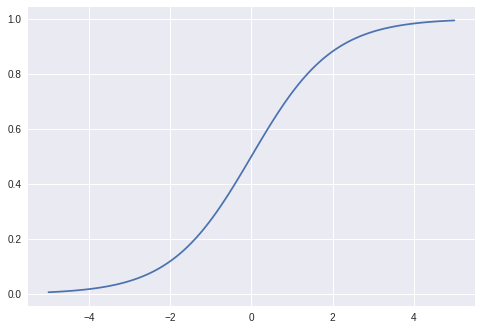

In [38]:
# FUNCIONES DE ACTIVACIÓN

# función sigmoide
# CORRECTA
#sigm = (lambda x: 1 / (1 + np.e ** (-x)),
 #      lambda x: (1 / (1 + np.e ** (-x))) * (1-(1 / (1 + np.e ** (-x))))) # derivada de la funcion sigmoide

#derivada mala
sigm = (lambda x: 1 / (1 + np.e ** (-x)),
        lambda x: x * (1 - x))
  
relu = lambda x: np.maximum(0,x)

# se grafica para probar la función sigmoide 
_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[0](_x)) # se prueba la derivada de la funcion sigmoide

In [0]:
# la red neuronal se va creando de forma iterativa

def create_nn(topology, act_f):
  
  nn = []
  
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l], topology[l+1], act_f))
   
  return nn


In [40]:

topology = [p, 4, 8, 1] # topologia de la red, se define el numero de neuronas que tenga la red, p=nro atributos de entrada(sera el numero de neuronas que tenga la primera capa), estos nro son arbitrarios
neural_net = create_nn(topology, sigm)
l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)** 2),
           lambda Yp, Yr: (Yp - Yr)) # error cuadratico medio(l2_cost), Yp: y predija y Yr: y real. y su derivada

# se le entregan los parametros:
# la red neuronal: creada anteriormente
# X e Y: la entrada (X) y la salida(Y) de la red neuronal
# l2_cost: la funcion de coste para optimizar la rws
# lr: el ratio de aprendizaje
def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)] # se guardan los pares de información de cada capa (z, a)
  
  # Forward pass
  for l,layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada en la primera capa. Out[-1] entrega el ultimo valor añadido
    a = neural_net[l].act_f[0](z)

    out.append((z,a))
  
  #print(l2_cost[0](out[-1][1], Y)) #el error cuadratico medio
  
  #si se quiere entrenar se realiza el backpropagation y gradient descent
  if train:
    
    # Backward pass
    deltas = []
    
    for l in reversed(range(0, len(neural_net))):
        
      z = out[l+1][0]
      a = out[l+1][1]
      
      if l == len(neural_net) -1:
        # Calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))  
      else:
        
        # calcular deltas a partir del delta de la ultima capa
        deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
      
      _W = neural_net[l].W 
    
      # Gradient descent 
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
   
  return out[-1][1]
  
train(neural_net, X, Y, l2_cost, 0.5)
print("")
  

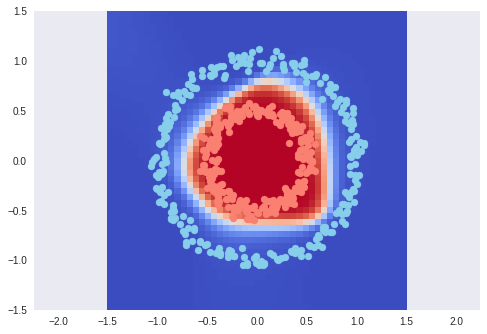

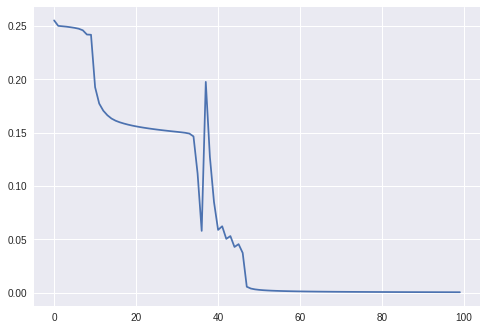

In [41]:
 # VISUALIZACIÓN Y TEST

import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2500):
    
  # Entrenemos a la red!
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)
  
  if i % 25 == 0:
    
    print(pY)
  
    loss.append(l2_cost[0](pY, Y))
  
    res = 50

    _x0 = np.linspace(-1.5, 1.5, res)
    _x1 = np.linspace(-1.5, 1.5, res)

    _Y = np.zeros((res, res))

    for i0, x0 in enumerate(_x0):
      for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train=False)[0][0]    

    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm")
    plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c="skyblue")
    plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c="salmon")

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)), loss)
    plt.show()
    time.sleep(0.5)  